##  Dependency installation

In [1]:
!conda install -c intel scikit-learn pandas nltk matplotlib langdetect textblob  -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



# Loading class

In [29]:
import string
import os

import pandas as pd

import nltk

nltk.download('stopwords')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

from langdetect import detect

from textblob import TextBlob

from wordcloud import WordCloud

import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
os.getcwd()

'/home/jovyan/work/tweets analyze'

In [5]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

# Load and transform data set

In [6]:
tweets_df = pd.read_csv('./medellin_tweets.csv', sep = ',')

In [7]:
tweets_df.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [8]:
tweets_df['sentiment'].value_counts(dropna = False)

NaN    4607
0.0     752
1.0     677
Name: sentiment, dtype: int64

In [9]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.763254
0.0    0.124586
1.0    0.112160
Name: sentiment, dtype: float64

In [10]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]
tweets_labeled_df.shape

(1429, 2)

In [11]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]
tweets_nolabeled_df.shape

(4607, 2)

# Splitting train and test datasets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)
X_train.shape
pd.Series(y_train).value_counts(normalize = True)
X_test.shape
pd.Series(y_test).value_counts(normalize = True)

0.0    0.527972
1.0    0.472028
Name: sentiment, dtype: float64

# Vectorizing texts

In [13]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)
X_bow = bow.fit_transform(X_train)
X_tfidf = tfidf.fit_transform(X_train)

# Training and evaluating a model using BOW

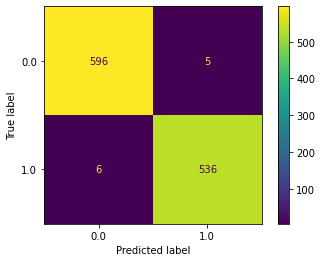

In [14]:
logistic_model = LogisticRegression(random_state = 2)
logistic_model.fit(X_bow, y_train)
y_train_bow_predict = logistic_model.predict(X_bow)
y_test_bow_predict = logistic_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)


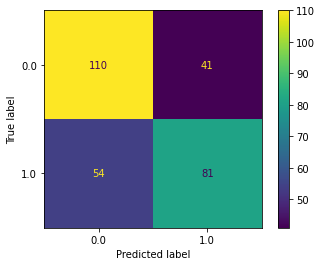

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [16]:
print('Precision:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precision: 0.6639344262295082
Recall: 0.6
F1: 0.6303501945525293


# Training and evaluating a model using TF-IDF

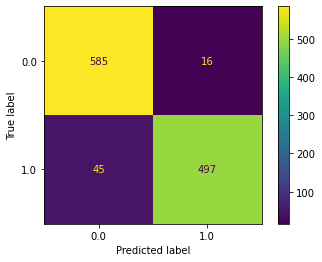

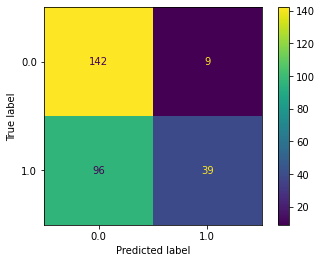

In [17]:
logistic_model = LogisticRegression(random_state = 2)
logistic_model.fit(X_tfidf, y_train)
y_train_tfidf_predict = logistic_model.predict(X_tfidf)
y_test_tfidf_predict = logistic_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)


In [18]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precision: 0.8125
Recall: 0.28888888888888886
F1: 0.4262295081967213


In [19]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for ind in tweets_df.index:
    print(tweets_df['full_text'][ind])
    tweet_list.append(tweets_df['full_text'][ind])
    analysis = TextBlob(tweets_df['full_text'][ind])
    score = SentimentIntensityAnalyzer().polarity_scores(tweets_df['full_text'][ind])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweets_df['full_text'][ind])
        negative += 1
    elif pos > neg:
        positive_list.append(tweets_df['full_text'][ind])
        positive += 1
    elif pos == neg:
        neutral_list.append(tweets_df['full_text'][ind])
        neutral += 1
        
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

@hugouribev: @isamg6 @MOinternationa @petrogustavo Por eso @petrogustavo odia a los antioqueños, por eso tiene a @QuinteroCalle acabando…
@maridelas18: Fueraaa, Petro de Medellín
@MunozEnith: Medellín se lució hoy. El repudio a Petro,nos da esperanzas. 👏👏👏👏👏👏👏 https://t.co/7rvp2uza6B
@isamg6: La historia contará que en Medellín se derrotó a Escobar, se revocó a Quintero y se le arrebató la presidencia a @petrogustavo…
@funurbiano: Los del asalto a la fundidora de oro en Medellín, han debido llamar a @karenabudi @Diego_Molano y a Alberto Ratasquilla...y…
@Don_Patriota1: Me acabo d enterar que al Senador del grupo narcoterrorista del M19; Gustavo Petro; fue echado de Medellín, por los pais…
@JoseMejiaCD: Abramos hilo de la abucheada tan bella que se ganó Petro en Medellín hace unos minutos: https://t.co/XiEs9eePIL
@Leo_uribista: ‼️Hermoso…así fue tratado en su visita Gustavo Petro en la ciudad de Medellín‼️
https://t.co/t2I6Fs0GkQ
@Nicols03804032: Hoy en el centro de Medellín, con Petro,

NameError: name 'percentage' is not defined

# Number of Tweets (Total, Positive, Negative, Neutral)

In [21]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  6036
positive number:  282
negative number:  1323
neutral number:  4431


# Creating PieCart

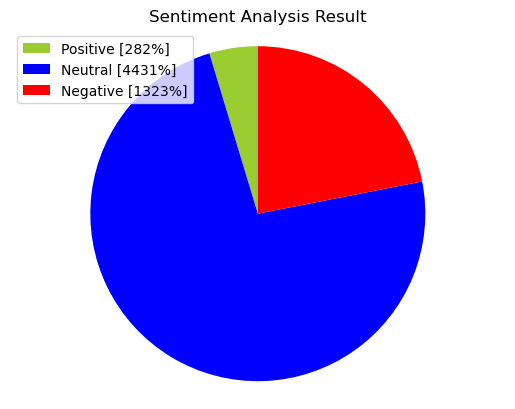

In [26]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result')
plt.axis('equal')
plt.show()

In [60]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
print(tweets_df['full_text'])
X=tweets_df['full_text']  # Features
y=tweets_df['sentiment']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X.isnull()
print(tweets_df)
for ind in tweets_df.index:
    if tweets_df['sentiment'][ind] is None:
        print("es nulo la vaina")
    else:
        print(tweets_df['full_text'][ind] is None)
#X = pd.DataFrame(tweets_df, columns=tweets_df['sentiment'])
#y = pd.Categorical.from_codes(X, y)

0       @hugouribev: @isamg6 @MOinternationa @petrogus...
1                @maridelas18: Fueraaa, Petro de Medellín
2       @MunozEnith: Medellín se lució hoy. El repudio...
3       @isamg6: La historia contará que en Medellín s...
4       @funurbiano: Los del asalto a la fundidora de ...
                              ...                        
6031    @Tigo_Colombia El peor prestador de servicios ...
6032    @wib2103: Los centros comerciales en Medellín....
6033    Medellín volvió al pasado, balaceras y caos. E...
6034    Así comenzó uno de los asaltos más espectacula...
6035    Homenaje al sociólogo Alberto Mayor Mora quien...
Name: full_text, Length: 6036, dtype: object
                                              full_text  sentiment
0     @hugouribev: @isamg6 @MOinternationa @petrogus...        0.0
1              @maridelas18: Fueraaa, Petro de Medellín        0.0
2     @MunozEnith: Medellín se lució hoy. El repudio...        0.0
3     @isamg6: La historia contará que en Medellí